In [1]:
!pip install gensim
!pip install nltk

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB 5.8 MB/s eta 0:00:05
    --------------------------------------- 0.5/24.0 MB 5.5 MB/s eta 0:00:05
   - -------------------------------------- 0.6/24.0 MB 5.7 MB/s eta 0:00:05
   - -------------------------------------- 0.8/24.0 MB 4.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.4/24.0 MB 5.9 MB/s eta 0:00:04
   -- ------------------------------------- 1.7/24.0 MB 6.0 MB/s eta 0:00:04
   --- ------------------------------------ 2.0/24.0 MB 6.0 MB/s eta 0:00:04
   --- ------------------------------------ 2.3/24.0 MB 6.1 MB/s eta 0:00:04
   ---- ----------------------------------- 2.5/24.0 MB 6.3 MB/s eta 0:00:04
   ---- ----------------------------------- 2.7/24.0 MB 6.1 MB/s eta 0:00:04
   -----

DEPRECATION: Loading egg at c:\python312\lib\site-packages\setuptools-70.2.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python312\lib\site-packages\setuptools-70.2.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Step 1: Import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from sklearn.datasets import fetch_20newsgroups
import nltk

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download
from pprint import pprint

[nltk_data] Downloading package punkt_tab to C:\Users\Aishwarya L
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishwarya L
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aishwarya L
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aishwarya L
[nltk_data]     Patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('combined_data.csv')

df.head()

,essay_id,prompt_id,content_text,score,content,prompt_adherence,language,narrativity,organization,word_choice,sentence_fluency,conventions,style,voice
0,1,1,"""Dear local newspaper, I think effects compute...",8,4.0,NaN,NaN,NaN,3.0,3.0,3.0,3.0,NaN,NaN
1,2,1,"""Dear @CAPS1 @CAPS2, I believe that using comp...",9,4.0,NaN,NaN,NaN,4.0,4.0,3.0,4.0,NaN,NaN
2,3,1,"""Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...",7,3.0,NaN,NaN,NaN,3.0,3.0,4.0,4.0,NaN,NaN
3,4,1,"""Dear Local Newspaper, @CAPS1 I have found tha...",10,5.0,NaN,NaN,NaN,4.0,5.0,4.0,4.0,NaN,NaN
4,5,1,"""Dear @LOCATION1, I know having computers has ...",8,4.0,NaN,NaN,NaN,3.0,4.0,4.0,4.0,NaN,NaN


In [6]:
# replace all NaN with -1
df.fillna(-1, inplace=True)


In [7]:
df.head()

,essay_id,prompt_id,content_text,score,content,prompt_adherence,language,narrativity,organization,word_choice,sentence_fluency,conventions,style,voice
0,1,1,"""Dear local newspaper, I think effects compute...",8,4.0,-1.0,-1.0,-1.0,3.0,3.0,3.0,3.0,-1.0,-1.0
1,2,1,"""Dear @CAPS1 @CAPS2, I believe that using comp...",9,4.0,-1.0,-1.0,-1.0,4.0,4.0,3.0,4.0,-1.0,-1.0
2,3,1,"""Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...",7,3.0,-1.0,-1.0,-1.0,3.0,3.0,4.0,4.0,-1.0,-1.0
3,4,1,"""Dear Local Newspaper, @CAPS1 I have found tha...",10,5.0,-1.0,-1.0,-1.0,4.0,5.0,4.0,4.0,-1.0,-1.0
4,5,1,"""Dear @LOCATION1, I know having computers has ...",8,4.0,-1.0,-1.0,-1.0,3.0,4.0,4.0,4.0,-1.0,-1.0


In [8]:
# Preprocess text (you can add more preprocessing steps as needed)
df['content_text'] = df['content_text'].str.lower()  # Convert to lowercase
df['content_text'] = df['content_text'].str.replace(r'@[\w]+', '', regex=True)  # Remove strings starting with @
df['content_text'] = df['content_text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove punctuation
df['content_text'] = df['content_text'].str.replace(r'\s+', ' ', regex=True)  # Remove extra whitespaces
df['content_text'] = df['content_text'].str.strip()  # Remove leading/trailing whitespaces


In [9]:
df.head()

,essay_id,prompt_id,content_text,score,content,prompt_adherence,language,narrativity,organization,word_choice,sentence_fluency,conventions,style,voice
0,1,1,dear local newspaper i think effects computers...,8,4.0,-1.0,-1.0,-1.0,3.0,3.0,3.0,3.0,-1.0,-1.0
1,2,1,dear i believe that using computers will benef...,9,4.0,-1.0,-1.0,-1.0,4.0,4.0,3.0,4.0,-1.0,-1.0
2,3,1,dear more and more people use computers but no...,7,3.0,-1.0,-1.0,-1.0,3.0,3.0,4.0,4.0,-1.0,-1.0
3,4,1,dear local newspaper i have found that many ex...,10,5.0,-1.0,-1.0,-1.0,4.0,5.0,4.0,4.0,-1.0,-1.0
4,5,1,dear i know having computers has a positive ef...,8,4.0,-1.0,-1.0,-1.0,3.0,4.0,4.0,4.0,-1.0,-1.0


In [10]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import os

# Define directories to save models and vectorizers
model_dir = "lda_models"
vectorizer_dir = "vectorizers"
os.makedirs(model_dir, exist_ok=True)
os.makedirs(vectorizer_dir, exist_ok=True)

num_prompts = df['prompt_id'].nunique()  # Determine the number of unique prompts
df['topic_coherence'] = None  # Placeholder for coherence scores


In [11]:
# Load 
handcrafted_df = pd.read_csv('hand_crafted_v3.csv')

In [12]:
target_prompt = 1 
train_df = df[df['prompt_id'] != target_prompt]
test_df = df

# Vectorize and train the LDA model
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
dtm_train = vectorizer.fit_transform(train_df['content_text'])

lda = LatentDirichletAllocation(n_components=num_prompts, random_state=42)
lda.fit(dtm_train)

# Save the LDA model and vectorizer for this prompt
model_filename = os.path.join(model_dir, f"lda_model_prompt_{target_prompt}.joblib")
vectorizer_filename = os.path.join(vectorizer_dir, f"vectorizer_prompt_{target_prompt}.joblib")

joblib.dump(lda, model_filename)
joblib.dump(vectorizer, vectorizer_filename)




['vectorizers\\vectorizer_prompt_1.joblib']

In [13]:
lda = joblib.load("lda_models/lda_model_prompt_1.joblib")
vectorizer = joblib.load("vectorizers/vectorizer_prompt_1.joblib")


# Apply LDA to target-prompt essays and calculate topic coherence
dtm_test = vectorizer.transform(test_df['content_text'])
topic_distributions = lda.transform(dtm_test)


In [14]:
topic_distributions

array([[9.27992291e-04, 9.27782275e-04, 1.43747294e-02, ...,
        9.26625298e-04, 5.16164281e-01, 9.27604825e-04],
       [7.58174891e-04, 8.66474326e-03, 7.59050905e-04, ...,
        7.58283472e-04, 5.25700963e-01, 2.77275690e-02],
       [1.07028411e-03, 1.06850083e-03, 1.07072996e-03, ...,
        2.02582877e-02, 6.26183226e-01, 1.07006716e-03],
       ...,
       [4.45686978e-04, 4.45130040e-04, 4.45641463e-04, ...,
        4.45554646e-04, 4.45705751e-04, 4.45255668e-04],
       [2.02454874e-02, 5.95423278e-04, 5.95668585e-04, ...,
        5.95540861e-04, 5.95697170e-04, 5.95836641e-04],
       [6.51762225e-04, 6.51177696e-04, 2.53901095e-02, ...,
        6.51325201e-04, 3.56592433e-02, 6.51569730e-04]])

In [15]:
test_df['topic_coherence'] = topic_distributions.max(axis=1)

In [16]:
test_df.head()

,essay_id,prompt_id,content_text,score,content,prompt_adherence,language,narrativity,organization,word_choice,sentence_fluency,conventions,style,voice,topic_coherence
0,1,1,dear local newspaper i think effects computers...,8,4.0,-1.0,-1.0,-1.0,3.0,3.0,3.0,3.0,-1.0,-1.0,0.516164
1,2,1,dear i believe that using computers will benef...,9,4.0,-1.0,-1.0,-1.0,4.0,4.0,3.0,4.0,-1.0,-1.0,0.525701
2,3,1,dear more and more people use computers but no...,7,3.0,-1.0,-1.0,-1.0,3.0,3.0,4.0,4.0,-1.0,-1.0,0.626183
3,4,1,dear local newspaper i have found that many ex...,10,5.0,-1.0,-1.0,-1.0,4.0,5.0,4.0,4.0,-1.0,-1.0,0.684903
4,5,1,dear i know having computers has a positive ef...,8,4.0,-1.0,-1.0,-1.0,3.0,4.0,4.0,4.0,-1.0,-1.0,0.525040


In [17]:
# rename essay_id to item_id
test_df.rename(columns={'essay_id': 'item_id'}, inplace=True)

In [18]:
handcrafted_df.head()

,item_id,prompt_id,mean_word,word_var,mean_sent,sent_var,ess_char_len,word_count,prep_comma,unique_word,...,WDT,DT,CD,NN,TO,JJ,VBP,RP,NNS,score
0,1,1,4.400593,5.842492,21.062500,171.308594,1483,337,71,117,...,0.000000,0.051546,0.000000,0.144330,0.025773,0.048969,0.030928,0.007732,0.043814,8.0
1,2,1,4.353222,5.469506,20.950000,142.247500,1824,419,70,125,...,0.002146,0.075107,0.008584,0.122318,0.017167,0.042918,0.036481,0.004292,0.087983,9.0
2,3,1,4.405018,5.545638,19.928571,184.637755,1229,279,41,113,...,0.000000,0.085714,0.006349,0.123810,0.025397,0.047619,0.076190,0.009524,0.111111,7.0
3,4,1,4.868321,6.415867,19.407407,135.722908,2551,524,77,179,...,0.003247,0.069805,0.000000,0.126623,0.024351,0.066558,0.040584,0.001623,0.086039,10.0
4,5,1,4.408602,5.450249,15.500000,43.516667,2050,465,56,128,...,0.005780,0.104046,0.009634,0.131021,0.040462,0.042389,0.036609,0.001927,0.078998,8.0


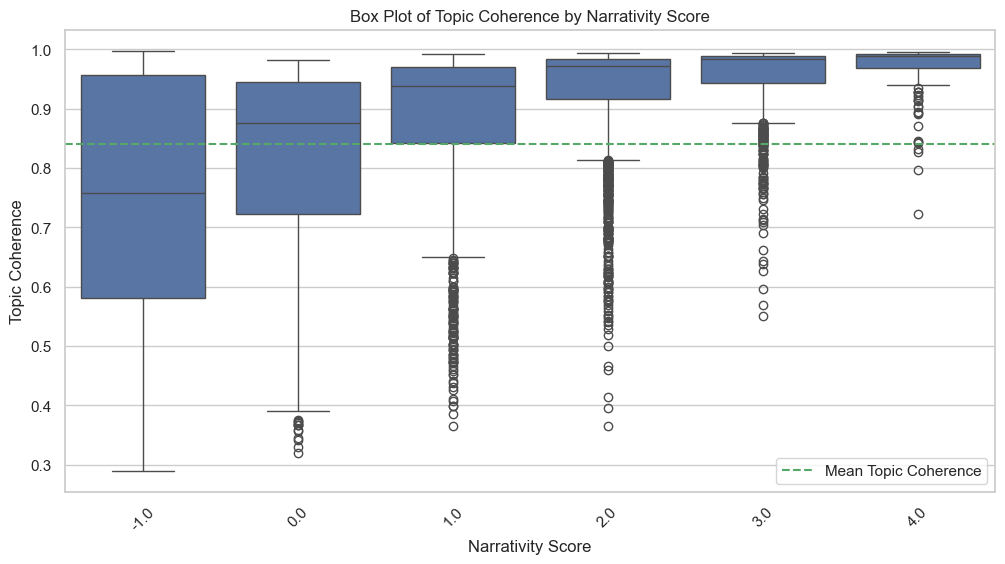

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='narrativity', y='topic_coherence', data=test_df)
plt.title('Box Plot of Topic Coherence by Narrativity Score')
plt.xlabel('Narrativity Score')
plt.ylabel('Topic Coherence')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.axhline(y=test_df['topic_coherence'].mean(), color='g', linestyle='--', label='Mean Topic Coherence')
plt.legend()
plt.show()

# save 




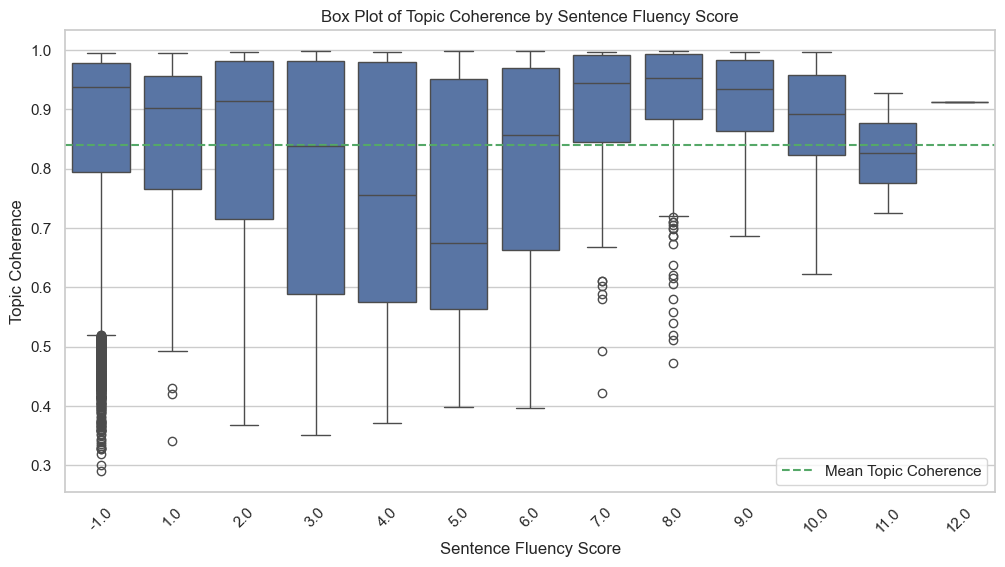

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentence_fluency', y='topic_coherence', data=test_df)
plt.title('Box Plot of Topic Coherence by Sentence Fluency Score')
plt.xlabel('Sentence Fluency Score')
plt.ylabel('Topic Coherence')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.axhline(y=test_df['topic_coherence'].mean(), color='g', linestyle='--', label='Mean Topic Coherence')
plt.legend()
plt.show()


In [21]:
# create another df which combines handcrafted_df an test_df aand adds only topic_coherence to the temp_df
temp_df = handcrafted_df.merge(test_df[['item_id', 'topic_coherence']], on='item_id', how='left')

In [22]:
temp_df.head()

,item_id,prompt_id,mean_word,word_var,mean_sent,sent_var,ess_char_len,word_count,prep_comma,unique_word,...,DT,CD,NN,TO,JJ,VBP,RP,NNS,score,topic_coherence
0,1,1,4.400593,5.842492,21.062500,171.308594,1483,337,71,117,...,0.051546,0.000000,0.144330,0.025773,0.048969,0.030928,0.007732,0.043814,8.0,0.516164
1,2,1,4.353222,5.469506,20.950000,142.247500,1824,419,70,125,...,0.075107,0.008584,0.122318,0.017167,0.042918,0.036481,0.004292,0.087983,9.0,0.525701
2,3,1,4.405018,5.545638,19.928571,184.637755,1229,279,41,113,...,0.085714,0.006349,0.123810,0.025397,0.047619,0.076190,0.009524,0.111111,7.0,0.626183
3,4,1,4.868321,6.415867,19.407407,135.722908,2551,524,77,179,...,0.069805,0.000000,0.126623,0.024351,0.066558,0.040584,0.001623,0.086039,10.0,0.684903
4,5,1,4.408602,5.450249,15.500000,43.516667,2050,465,56,128,...,0.104046,0.009634,0.131021,0.040462,0.042389,0.036609,0.001927,0.078998,8.0,0.525040


In [23]:
# save temp_df
temp_df.to_csv('final_df_1.csv', index=False)

In [24]:
import pandas as pd
import os
import joblib
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
df = pd.read_csv('combined_data.csv')

# Preprocess text
df['content_text'] = df['content_text'].str.lower()  # Convert to lowercase
df['content_text'] = df['content_text'].str.replace(r'@[\w]+', '', regex=True)  # Remove strings starting with @
df['content_text'] = df['content_text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove punctuation
df['content_text'] = df['content_text'].str.replace(r'\s+', ' ', regex=True)  # Remove extra whitespaces
df['content_text'] = df['content_text'].str.strip()  # Remove leading/trailing whitespaces

# Define directories to save models and vectorizers
model_dir = "lda_models"
os.makedirs(model_dir, exist_ok=True)

num_prompts = df['prompt_id'].nunique()  # Determine the number of unique prompts
df['topic_coherence'] = None  # Placeholder for coherence scores

# Load handcrafted data
handcrafted_df = pd.read_csv('hand_crafted_v3.csv')

target_prompt = 1 
train_df = df[df['prompt_id'] != target_prompt]
test_df = df

# Create a Gensim dictionary and corpus
texts = [text.split() for text in train_df['content_text']]  # Tokenize the text
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=num_prompts, id2word=dictionary, random_state=42)

# Step 6: Evaluate Topics using Coherence Model
coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_npmi')
topic_coherence = coherence_model.get_coherence_per_topic()

# Save the LDA model
model_filename = os.path.join(model_dir, f"lda_model_prompt_{target_prompt}.model")
lda_model.save(model_filename)

# Apply LDA to target-prompt essays and calculate topic coherence
test_texts = [text.split() for text in test_df['content_text']]  # Tokenize test data
test_corpus = [dictionary.doc2bow(text) for text in test_texts]  # Create bag-of-words for test data

# Get topic distributions for test essays
topic_distributions = lda_model.get_document_topics(test_corpus)

# Extract the maximum topic probability for each essay
test_df['topic_coherence'] = [max(topics, key=lambda x: x[1])[1] if topics else 0 for topics in topic_distributions]

# Rename essay_id to item_id
test_df.rename(columns={'essay_id': 'item_id'}, inplace=True)

# Create another df which combines handcrafted_df and test_df and adds only topic_coherence to the temp_df
temp_df = handcrafted_df.merge(test_df[['item_id', 'topic_coherence']], on='item_id', how='left')

# Save temp_df
temp_df.to_csv(f'final_df_{target_prompt}.csv', index=False)
